In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
wind_solar = pd.read_csv(
    "/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/data/final_tables/ercot_region/ercot_all_regions_train.csv"
)

In [116]:
wind_solar.columns

Index(['time', 'wind', 'solar', 'load', 'temperature', 'humidity',
       'cloudcover', 'windspeed', 'direct_radiation', 'diffuse_radiation',
       'global_radiation', 'year', 'month', 'day_of_week', 'day', 'hour',
       'direct_radiation_24h_ahead', 'diffuse_radiation_24h_ahead',
       'global_radiation_24h_ahead', 'windspeed_24h_ahead', 'region',
       'direct_radiation_24h_ahead_5p', 'diffuse_radiation_24h_ahead_5p',
       'global_radiation_24h_ahead_5p', 'windspeed_24h_ahead_5p',
       'direct_radiation_24h_ahead_10p', 'diffuse_radiation_24h_ahead_10p',
       'global_radiation_24h_ahead_10p', 'windspeed_24h_ahead_10p',
       'direct_radiation_24h_ahead_20p', 'diffuse_radiation_24h_ahead_20p',
       'global_radiation_24h_ahead_20p', 'windspeed_24h_ahead_20p',
       'direct_radiation_24h_ahead_50p', 'diffuse_radiation_24h_ahead_50p',
       'global_radiation_24h_ahead_50p', 'windspeed_24h_ahead_50p',
       'direct_radiation_24h_ahead_100p', 'diffuse_radiation_24h_ahead_100

In [174]:
wind_solar

,time,wind,solar,load,temperature,humidity,cloudcover,windspeed,direct_radiation,diffuse_radiation,...,global_radiation_24h_ahead_20p,windspeed_24h_ahead_20p,direct_radiation_24h_ahead_50p,diffuse_radiation_24h_ahead_50p,global_radiation_24h_ahead_50p,windspeed_24h_ahead_50p,direct_radiation_24h_ahead_100p,diffuse_radiation_24h_ahead_100p,global_radiation_24h_ahead_100p,windspeed_24h_ahead_100p
0,2017-01-01 00:00:00,0.065317,0.0,0.093649,17.6,98,74,5.8,0.0,0.0,...,0.0,11.287601,0.0,0.0,0.0,8.293988,0.0,0.0,0.0,15.313503
1,2017-01-01 01:00:00,0.076696,0.0,0.074517,16.5,99,37,5.1,0.0,0.0,...,0.0,6.593426,0.0,0.0,0.0,9.590197,0.0,0.0,0.0,4.917864
2,2017-01-01 02:00:00,0.100236,0.0,0.060623,15.7,100,100,3.3,0.0,0.0,...,0.0,10.243232,0.0,0.0,0.0,6.955566,0.0,0.0,0.0,24.241495
3,2017-01-01 03:00:00,0.080218,0.0,0.051051,15.5,100,100,0.7,0.0,0.0,...,0.0,10.715464,0.0,0.0,0.0,23.123209,0.0,0.0,0.0,9.348604
4,2017-01-01 04:00:00,0.062933,0.0,0.049211,16.1,99,100,1.5,0.0,0.0,...,0.0,16.802154,0.0,0.0,0.0,11.829976,0.0,0.0,0.0,4.598437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134203,2018-11-30 19:00:00,0.911238,0.0,0.671216,15.1,29,0,42.0,0.0,0.0,...,0.0,14.826582,0.0,0.0,0.0,20.279130,0.0,0.0,0.0,14.102521
134204,2018-11-30 20:00:00,0.911363,0.0,0.663893,14.6,29,0,41.8,0.0,0.0,...,0.0,24.798467,0.0,0.0,0.0,31.291508,0.0,0.0,0.0,14.052001
134205,2018-11-30 21:00:00,0.935459,0.0,0.655184,14.5,31,0,37.8,0.0,0.0,...,0.0,32.593225,0.0,0.0,0.0,31.191083,0.0,0.0,0.0,14.547323
134206,2018-11-30 22:00:00,0.963839,0.0,0.641139,14.1,33,0,33.8,0.0,0.0,...,0.0,22.676536,0.0,0.0,0.0,13.729243,0.0,0.0,0.0,0.000000


In [118]:
column = "temperature"
min(wind_solar[column]), max(wind_solar[column])

(-12.5, 43.2)

In [119]:
na_rows_count = wind_solar.isna().any(axis=1).sum()

print(f"Number of rows with at least one NA value: {na_rows_count}")

Number of rows with at least one NA value: 0


In [120]:
rows_with_na = wind_solar[wind_solar.isna().any(axis=1)][["direct_radiation_24h_ahead", 
                                                          "diffuse_radiation_24h_ahead", 
                                                          "global_radiation_24h_ahead", 
                                                          "direct_radiation_24h_ahead_5p"]]

print(rows_with_na)

Empty DataFrame
Columns: [direct_radiation_24h_ahead, diffuse_radiation_24h_ahead, global_radiation_24h_ahead, direct_radiation_24h_ahead_5p]
Index: []


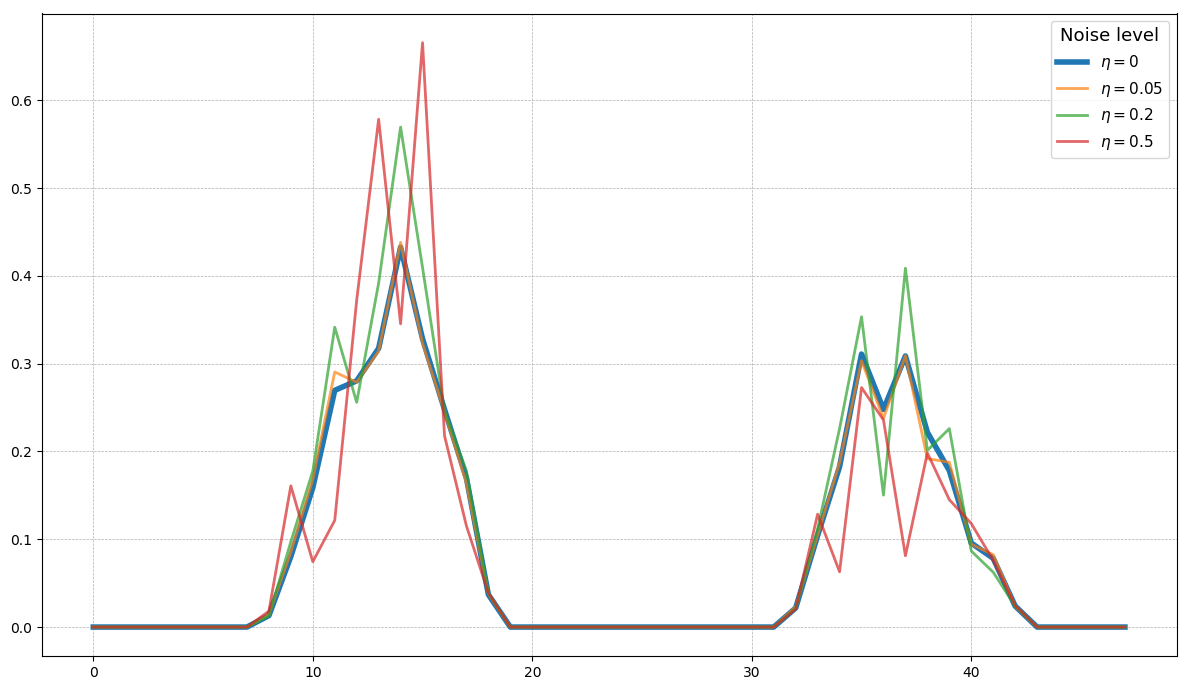

In [173]:
start=24*14
cols_of_interest = [
                    "diffuse_radiation_24h_ahead_5p",
                    'diffuse_radiation_24h_ahead_20p',
                    "diffuse_radiation_24h_ahead_50p"
                    ]
plt.figure(figsize=(12,7))
x=np.arange(24*2)
    
plt.plot(x, wind_solar['diffuse_radiation_24h_ahead'][start:start+24*2], label=r'$\eta=0$', linewidth=4)
for c in cols_of_interest:
    label=r'$\eta=' + f"{int(c.split('_')[-1].split('p')[0])/100}" + '$'
    plt.plot(x, wind_solar[c][start:start+24*2], label=label, linewidth=2, alpha=0.7)
# Improve the legend
plt.legend(title='Noise level', title_fontsize='13', fontsize='11')
# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SpringInterimReport/solar_noise.pdf", 
            format="pdf", 
            bbox_inches="tight")
plt.show()


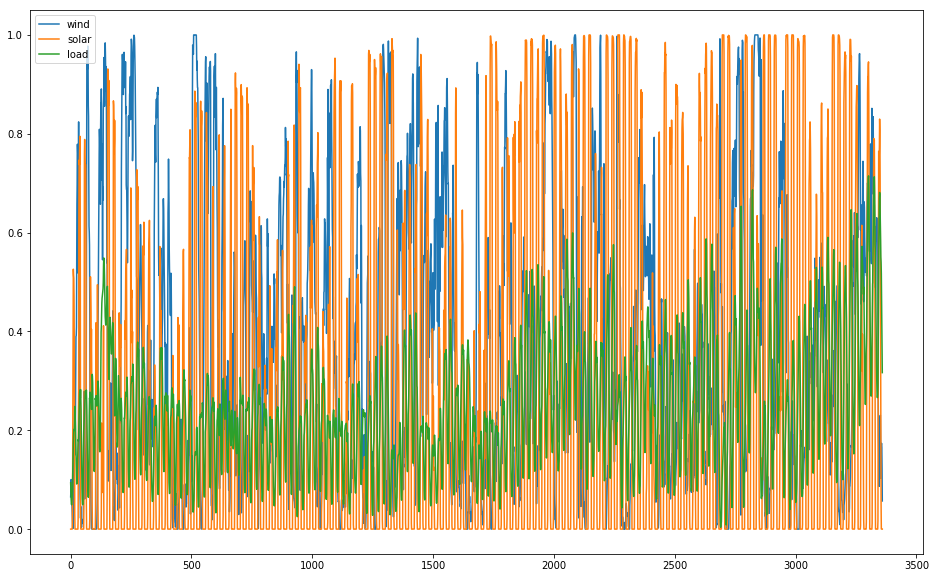

In [100]:
plt.figure(figsize=(16,10))
plt.plot(wind_solar['wind'][:24*7*20])
plt.plot(wind_solar['solar'][:24*7*20])
plt.plot(wind_solar['load'][:24*7*20])
plt.legend()

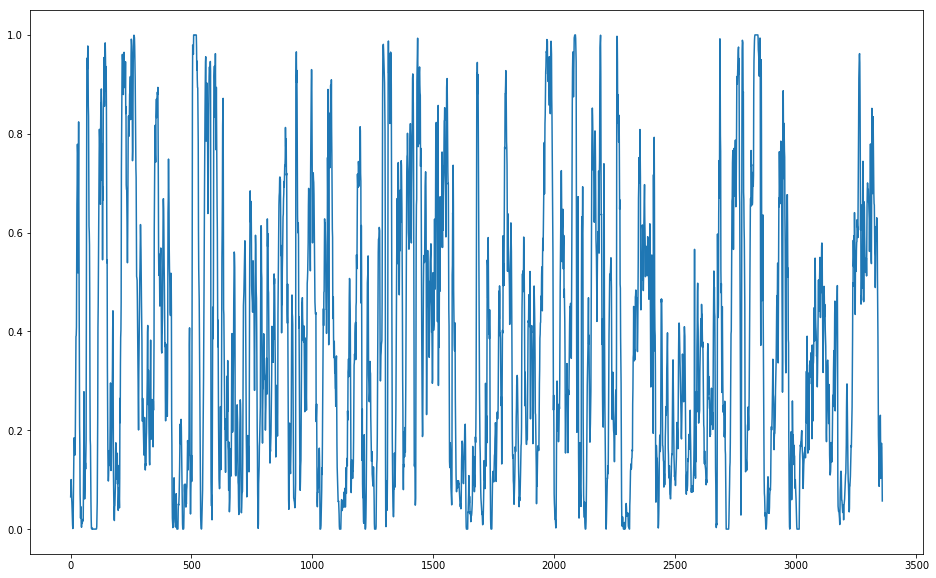

In [105]:
plt.figure(figsize=(16,10))
plt.plot(wind_solar['wind'][:24*7*20])